In [14]:
"""
Author: Ryan Quirk, Huntley Hedrick, Matthew Griffith
Files: Analysis.ipynb, 
Project Description: 
"""

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_excel("soccer_data.xlsx") 

# First visualization shows the average number of goals per age ranges
# Age ranges are >20, 20-24, 25-29, 30+


age_count = {}
b20 = []
b25 = []
b30 = []
b35 = []
a35 = []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals"]

    if age in age_count.keys():
        age_count.update({age: age_count[age] + 1})
    else:
        age_count.update({age: 1})

    if age < 20:
        b20.append(goals)
        continue
    elif age < 25:
        b25.append(goals)
        continue
    elif age < 30:
        b30.append(goals)
        continue
    elif age < 35:
        b35.append(goals)
        continue
    else:
        a35.append(goals)

ranges = [">20", "20-24", "25-29", "30-34", "35+"]
values = [sum(b20)/len(b20), sum(b25)/len(b25), sum(b30)/len(b30), sum(b35)/len(b35), sum(a35)/len(a35) ]


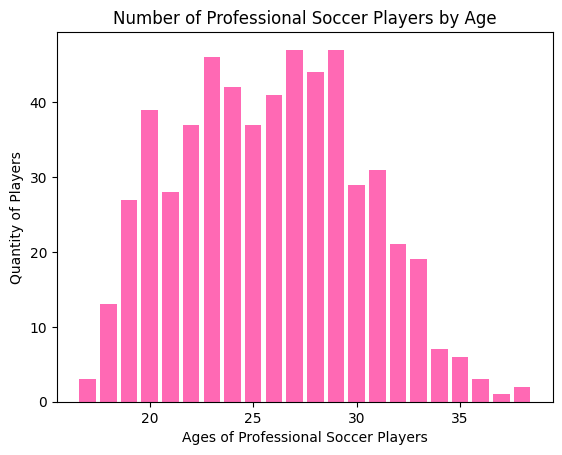

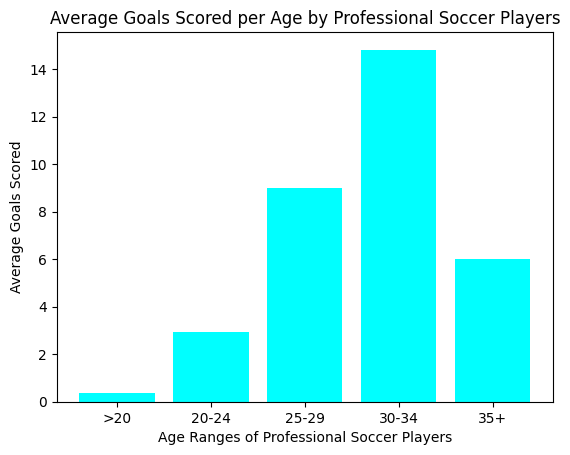

In [ ]:
# Quantity of players sorted by age
plt.bar(age_count.keys(), age_count.values(), color="purple")
plt.xlabel("Ages of Professional Soccer Players")
plt.ylabel("Quantity of Players")
plt.title("Number of Professional Soccer Players by Age")
plt.show()


plt.bar(ranges, values, color="hotpink")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored")
plt.title("Average Goals Scored per Age by Professional Soccer Players")
plt.show()
